In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 26 11:07:42 2018

@author: hassan.naseri
"""

# Import the Qiskit SDK
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, IBMQ, execute
from qiskit.tools.visualization import plot_histogram

# This is only to disable extra warnings/messages
import logging
logging.getLogger("qiskit.tools.visualization").setLevel(logging.ERROR)

In [ ]:
# Save your credentials (API Token).
# You can get it from https://quantumexperience.ng.bluemix.net/qx/account,
# looking for "Personal Access Token" section.
# NOTE: you need to save your credentials only once!
#APItoken = ''
#ProjectURL = ''
#IBMQ.save_account(APItoken, ProjectURL)

# Authenticate with the IBM Q API in order to use online devices.
# You need your credentials (API Token) to be already saved.
#IBMQ.load_accounts()

# Alternatively you can enable your account without saving it.
#IBMQ.enable_account(APItoken, ProjectURL)


In [4]:
# See a list of available backends
print("Local backends: ", Aer.backends()) # Local backend (simulator only)
#print("IBMQ backends: ", IBMQ.backends()) # IBMQ backends

Local backends:  [AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator'), PulseSimulator('pulse_simulator')]


In [7]:
# Create a Quantum Register with 1 qubit. The initial state is |0>
q = QuantumRegister(1)
# Create a Classical Register with 1 bit.
c = ClassicalRegister(1)
# Create a Quantum Circuit
qc = QuantumCircuit(q, c)

# Add Hadamard gate to the qubit, putting it in superposition state.
# qc.h() add a Hadamard gate to the circuit

# Add a Measurement gate to see the state.
qc.measure(q, c)

print(qc)

      ┌─┐
  q2: ┤M├
      └╥┘
c2: 1/═╩═
       0 


In [8]:
# Compile and run the Quantum circuit on a local simulator backend
# By default, it will run for 1000 shots
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend)
# Compile and run the Quantum circuit on an IBM Q backend
#backend = IBMQ.get_backend('')
#job_sim = execute(qc, backend)

sim_result = job_sim.result()

# Show the results
print("simulation: ", sim_result)
print(sim_result.get_counts(qc))

simulation:  Result(backend_name='qasm_simulator', backend_version='0.10.4', qobj_id='b8054eef-f53b-4ca4-b43c-8f0405713589', job_id='72e1ac8d-c32f-4f62-b5b1-139947c2d5ca', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1024}), header=QobjExperimentHeader(clbit_labels=[['c2', 0]], creg_sizes=[['c2', 1]], global_phase=0.0, memory_slots=1, metadata={}, n_qubits=1, name='circuit-7', qreg_sizes=[['q2', 1]], qubit_labels=[['q2', 0]]), status=DONE, seed_simulator=713819905, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [0], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 1, 'num_clbits': 1, 'input_qubit_map': [[0, 0]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 12, 'fusion': {'enabled': False}}, time_taken=0.0021412)], date=2022-05-15T15:11:17.413015, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', 

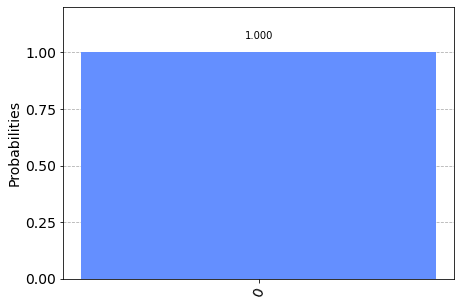

In [12]:
plot_histogram(sim_result.get_counts(qc))